In [9]:
import os


import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

df_hw = pd.read_parquet('/Trex/case_results/i.e215.I2000Clm50SpGs.hw_production.02/research_results/parquet/HW_1985_1994.parquet')
df_count = df_hw.groupby(['lat', 'lon']).size()
df_count_sorted = df_count.sort_values(ascending=False)

In [6]:
df_hw.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 20107224 entries, (-40.994766, 288.75, Timestamp('1985-12-01 00:00:00')) to (62.67016, 113.75, Timestamp('1994-07-15 23:00:00'))
Data columns (total 3 columns):
 #   Column  Dtype  
---  ------  -----  
 0   UHI     float32
 1   UBWI    float32
 2   HW      float64
dtypes: float32(2), float64(1)
memory usage: 442.4 MB


In [4]:

df_count_sorted.info()

<class 'pandas.core.series.Series'>
MultiIndex: 50 entries, (-5.183246, 322.5) to (29.685863, 40.0)
Series name: None
Non-Null Count  Dtype
--------------  -----
50 non-null     int64
dtypes: int64(1)
memory usage: 1.9 KB


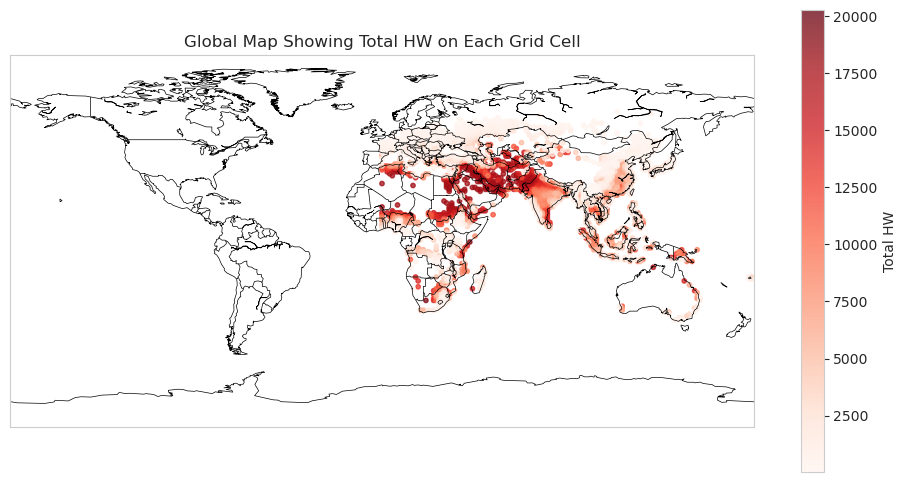

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
# Create a figure with a specific size
plt.figure(figsize=(12, 6))

# Create a Basemap instance for a simple cylindrical projection, with coastlines and country boundaries
m = Basemap(projection='cyl', resolution='c', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines(linewidth=0.5)
m.drawcountries(linewidth=0.5)

# Convert latitudes and longitudes to map projection coordinates
x, y = m(df_count_sorted.index.get_level_values('lon').values, df_count_sorted.index.get_level_values('lat').values)

# Scatter plot: plotting the total HW values for each grid cell on the map
m.scatter(x, y, c=df_count_sorted.values, s=10, cmap='Reds', alpha=0.75, latlon=False)

# Add a color bar to indicate the scale of HW values
plt.colorbar(label='Total HW')

# Title for the map
plt.title('Global Map Showing Total HW on Each Grid Cell')

plt.show()

